In [1]:
import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:

mba = pd.read_csv("MBA.csv")
mba['gender'].replace('Female', 1,inplace=True)
mba['gender'].replace('Male', 1,inplace=True)
mba['international'].replace(False , 0,inplace=True)
mba['international'].replace(True , 1,inplace=True)
mba.loc[mba.major =="STEM", 'major'] = 1
mba.loc[mba.major != 1, 'major'] = 0
mba.loc[mba.work_industry =="Technology", 'work_industry'] = 1
mba.loc[mba.work_industry != 1, 'work_industry'] = 0

mba.loc[mba.admission =="Admit", 'admission'] = 1
mba.loc[mba.admission != 1, 'admission'] = 0


y =  mba["admission"]
X = mba.loc[:, mba.columns != 'admision']
X = X.loc[:, X.columns != 'aplication_id']
X = X.loc[:, X.columns != 'race']
X = X.round()
y = pd.to_numeric(y)

In [3]:
train_score=[]
test_score =[]
test_size =[]
for i in range(10,100,1):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=42)

    clf = MLPClassifier(random_state=1).fit(X_train, y_train)
    
    clf.predict(X_train)
    train_score.append(clf.score(X_train, y_train))
    
    clf.predict(X_test)
    test_score.append(clf.score(X_test, y_test))
    
    test_size.append(i/100)
    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

Text(0, 0.5, 'train_score')

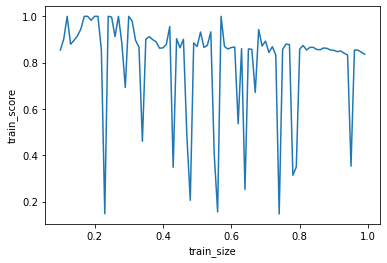

In [4]:
plt.plot(test_size,train_score)
plt.xlabel("train_size")
plt.ylabel("train_score")


Text(0, 0.5, 'test_score')

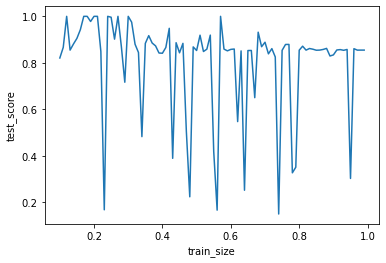

In [5]:
plt.plot(test_size,test_score)
plt.xlabel("train_size")
plt.ylabel("test_score")

In [6]:
X_test = X_test.astype(float)

In [7]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.8548834175770422

Hyper parameter tuning

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.60, random_state=42)
train_score=[]
test_score =[]
ephocs =[]
for i in range(1, 500,50):
    
    

    clf = MLPClassifier(random_state=1,max_iter=i).fit(X_train, y_train)
    
    clf.predict(X_train)
    train_score.append(clf.score(X_train, y_train))
    
    clf.predict(X_test)
    test_score.append(clf.score(X_test, y_test))
    
    ephocs.append(i)
    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'test_score')

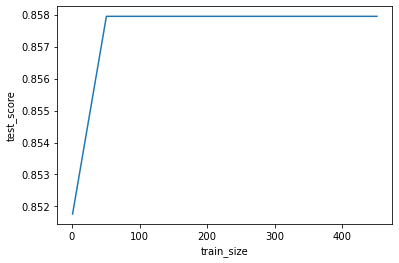

In [9]:
plt.plot(ephocs,test_score)
plt.xlabel("train_size")
plt.ylabel("test_score")

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.60, random_state=42)
train_score=[]
test_score =[]
ephocs =[]
for i in range(1, 500,10):
    
    

    clf = MLPClassifier(random_state=1,max_iter=100, hidden_layer_sizes = (i,)).fit(X_train, y_train)
    
    clf.predict(X_train)
    train_score.append(clf.score(X_train, y_train))
    
    clf.predict(X_test)
    test_score.append(clf.score(X_test, y_test))
    
    ephocs.append(i)
    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'test_score')

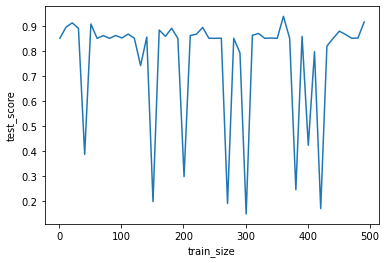

In [11]:
plt.plot(ephocs,test_score)
plt.xlabel("train_size")
plt.ylabel("test_score")

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.60, random_state=42)
clf = MLPClassifier(random_state=1,activation= 'tanh').fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.8517621737960721

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.60, random_state=42)
clf = MLPClassifier(random_state=1,activation= 'relu').fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.8579499596448749